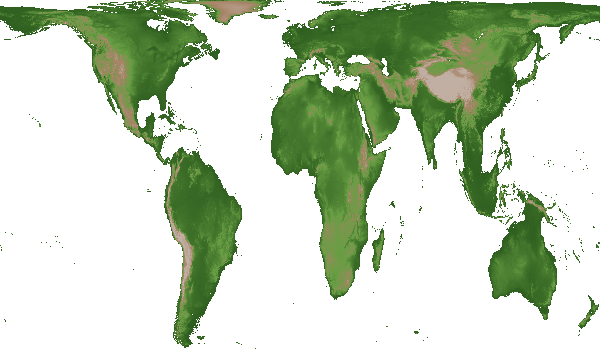

Image dimensions: 600x351 pixels


In [1]:
# first load image and show with pil
from PIL import Image
from IPython.display import display

# Load the image
image_path = "ch1_map.png"
image = Image.open(image_path)
image = image.convert("RGBA")  # Ensure it's in RGBA format
# Display the image
display(image)
# print dimensions of the image
print(f"Image dimensions: {image.size[0]}x{image.size[1]} pixels")


Binary matrix shape: (351, 600)
First 10 rows of the binary matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


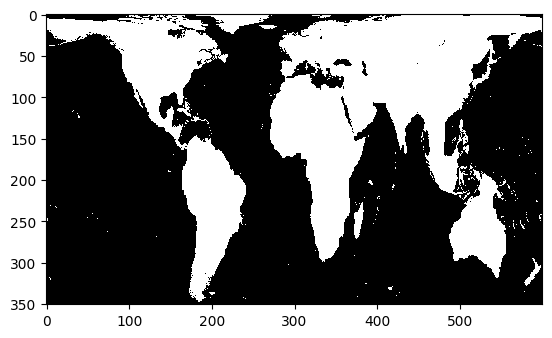

In [2]:
# make a matrix with similar dimensions such that all white pixels are 0 and all other pixels are 1
import numpy as np
# Convert the image to a numpy array
image_array = np.array(image)
# Create a mask where white pixels are 0 and all other pixels are 1
mask = np.all(image_array[:, :, :3] == [255, 255, 255], axis=-1)
# Convert the mask to a binary matrix
binary_matrix = np.where(mask, 0, 1)
# Print the shape of the binary matrix
print(f"Binary matrix shape: {binary_matrix.shape}")
# Print the first 10 rows of the binary matrix
print("First 10 rows of the binary matrix:")
print(binary_matrix[:10])
# show as black white image
import matplotlib.pyplot as plt
plt.imshow(binary_matrix, cmap='gray', interpolation='nearest')

In [3]:
# flip the y-axis to match the coordinate system of the grid
binary_matrix_flipped = np.flipud(binary_matrix)

In [4]:
# Has multi-dimensional arrays and matrices.
# Has a large collection of mathematical functions to operate on these arrays.
import numpy as np

# Data manipulation and analysis.
import pandas as pd

# Data visualization tools.
import seaborn as sns

import mesa
from mesa.discrete_space import CellAgent, OrthogonalMooreGrid
from mesa.visualization import SolaraViz, make_plot_component, make_space_component

class DispersalAgent(CellAgent):
    """An agent that can reproduce and disperse, avoiding blockers."""

    def __init__(self, model, cell, growth_rate):
        """Initialize the agent."""
        super().__init__(model)
        self.cell = cell
        self.growth_rate = growth_rate

    def hatch(self):
        """Hatch a new agent in an empty cell depending on growth rate."""
        # Check if the agent can hatch based on its growth rate
        if self.random.random() < self.growth_rate:
            # Get the neighbors using the cell's neighborhood
            neighbors = list(self.cell.neighborhood.cells)
            
            # Identify empty cells (cells with no agents at all)
            empty_cells = [cell for cell in neighbors if len(cell.agents) == 0]
            
            # empty_cells cannot be where binary_matrix is 0
            empty_cells = [cell for cell in empty_cells if binary_matrix[cell.coordinate[1], cell.coordinate[0]] == 1]

            if empty_cells:
                # Choose a random empty cell to hatch into
                new_cell = self.random.choice(empty_cells)
                
                # Create a new agent in the chosen cell
                DispersalAgent(self.model, new_cell, self.growth_rate)

class DispersalModel(mesa.Model):
    """A model with a grid of cells and agents that can occupy them."""

    def __init__(self, n=10, width=650, height=351, seed=None, growth_rate=0.1):
        """Initialize the model instance
        
        Args:            
            n (int): Number of agents to create.
            width (int): Width of the grid.
            height (int): Height of the grid.
            seed (int, optional): Random seed for reproducibility.
        """
        super().__init__(seed=seed)
        self.num_agents = n
        self.grid = OrthogonalMooreGrid(dimensions=(width, height), torus=True, random=self.random)

        # Create cells and agents
        possible_positions = self.grid.all_cells.cells
        # Only select from a specific rectangular area
        min_x,min_y, max_x, max_y = 350, 150, 370, 170
        # filter the possible positions to only those within the specified rectangle
        filtered_possible_positions = [cell for cell in possible_positions
                                       if min_x <= cell.coordinate[0] <= max_x and
                                            min_y <= cell.coordinate[1] <= max_y]
        
        DispersalAgent.create_agents(model=self,
                                     n=self.num_agents, 
                                     growth_rate=growth_rate,
                                     cell=self.random.choices(filtered_possible_positions, k=self.num_agents),)
        
    def step(self):
        """Advance the model by one step."""
        self.agents.shuffle_do("hatch")

<IPython.core.display.Javascript object>

In [5]:
model = DispersalModel(n=10, width=600, height=351)
for _ in range(1):
    model.step()


In [6]:
def agent_portrayal(agent):
    return {
        "color": "tab:red",
        "size": 10,
    }

# Model parameters for visualization
model_params = {
    "n": {
        "type": "SliderInt",
        "value": 20,
        "label": "Number of agents:",
        "min": 5,
        "max": 100,
        "step": 1,
    },
    "growth_rate": {
        "type": "SliderFloat",
        "value": 0.1,
        "label": "Growth rate:",
        "min": 0.0,
        "max": 0.5,
        "step": 0.02,
    },
    "width": 600,   # For testing, use smaller grid
    "height": 351,  # For full size, use 600x351
}



In [ ]:
# Create initial model instance
SpaceGraph = make_space_component(agent_portrayal)

# TODO visualize it

page = SolaraViz(
    model,
    components=[SpaceGraph],
    model_params=model_params,
    name="Dispersal",
)


In [8]:
page


Cannot show ipywidgets in text